# Exploratory Data Analysis

The world's population is at 7.8 billion and climbing. With this many mouths to feed it is of interest to agricultural organizations, entrepreneurs, governments and of vital importance to _humanity_ that we find efficient feeding solutions.

Earth's climate is changing and it is both affecting and affected by the way we grow our food.
This dataset, put together by the Food and Agriculture Organization of the United Nations available [here](https://www.kaggle.com/dorbicycle/world-foodfeed-production/download), provides insight on worldwide food production.

The dataset presents the pattern of a country's food supply for both humans and livestock from 1961 to 2013. It focuses on two utilizations of each food item available:

- ```Food``` - refers to the total amount of the food item available as human food during the reference period.
- ```Feed``` - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

The quantity of each is broken out by year and measured in units of ```1000 metric tons```.

One of the beautiful things about Python is its abundance of graphing tools. Let's see what data visualizations we can come up with.

### Import Packages and Read in Data

In [1]:
## Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Prevent warning messages
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('FAO.csv',encoding='ISO-8859-1')

In [4]:
df.shape

(21477, 63)

In [5]:
df.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


**How many countries do we have?**

In [6]:
df['Area'].nunique()

174

# Australia

The data aggragates the crops of many different countries. Let's narrow the scope down to just one country to get an idea of some of the content available.

In [7]:
au = df[df['Area']=='Australia']
au.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
812,AUS,10,Australia,2511,Wheat and products,5521,Feed,1000 tonnes,-25.27,133.78,...,3060.0,3788.0,4501.0,3498.0,4134.0,1940.0,3764.0,2455.0,3134,3200
813,AUS,10,Australia,2511,Wheat and products,5142,Food,1000 tonnes,-25.27,133.78,...,1319.0,1308.0,1369.0,1439.0,1568.0,1678.0,1649.0,1684.0,1602,1645
814,AUS,10,Australia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-25.27,133.78,...,202.0,205.0,206.0,210.0,247.0,251.0,260.0,248.0,243,258


**How many pounds of food were available in 2013?**

In [8]:
1000*2204.6 * au.groupby('Element').sum()['Y2013'][1]

96947285000.0

### Food vs Feed Supply

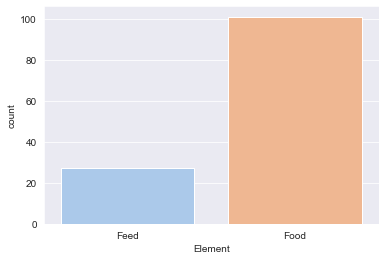

In [9]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.countplot(x='Element',data=au)

## Top Foods of 2013

In [10]:
au_10 = au[au['Element']=='Food'].groupby('Item').sum().reset_index()[['Item','Y2013']].sort_values('Y2013',ascending=False).head(10)
au_10 = au_10.rename(columns={'Y2013':'Amount'})
au_10

,Item,Amount
48,Milk - Excluding Butter,10948
46,Meat,2713
0,Alcoholic Beverages,2610
95,Vegetables,2400
8,Beer,2081
34,Fruits - Excluding Wine,2058
15,Cereals - Excluding Beer,2048
97,Wheat and products,1645
96,"Vegetables, Other",1473
84,Starchy Roots,1318


In [13]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

au_10.iplot(kind='bar',x='Item',y='Amount')

## Individual Food Trends

The following function essentially extracts a time series for a specified item and turns it into a graph-friendly input.

In [14]:
def plot_supply(df,element,product): ## Pass in df, 'feed' or 'food', the Item
    if element == 'food':
        dff = df[df['Element']=='Food']
    if element == 'feed':
        dff = df[df['Element']=='Feed']
        
    dfgb = dff.groupby('Item').sum().reset_index()
    dfgb = dfgb[dfgb['Item']==product].T
    dfgb.columns = dfgb.iloc[0] ## Rename columns
    dfgb = dfgb.drop(dfgb.index[0]) ## Drop the col names as a row in the df
    dfgb = dfgb[5:] ## Get rid of the non-year rows
    dfgb.reset_index(inplace=True)
    dfgb = dfgb.rename(columns={'index':'year',product:'amount'})
    
    dfgb['year'] = dfgb['year'].str.strip('Y')
    dfgb['amount'] = dfgb['amount'].astype('float')
    
    dims = (20, 10)
    fig, ax = plt.subplots(figsize=dims)

    sns.barplot(x='year',y='amount',data=dfgb,ax=ax)
    plt.xticks(rotation=30)
    plt.title(product)

### Meat

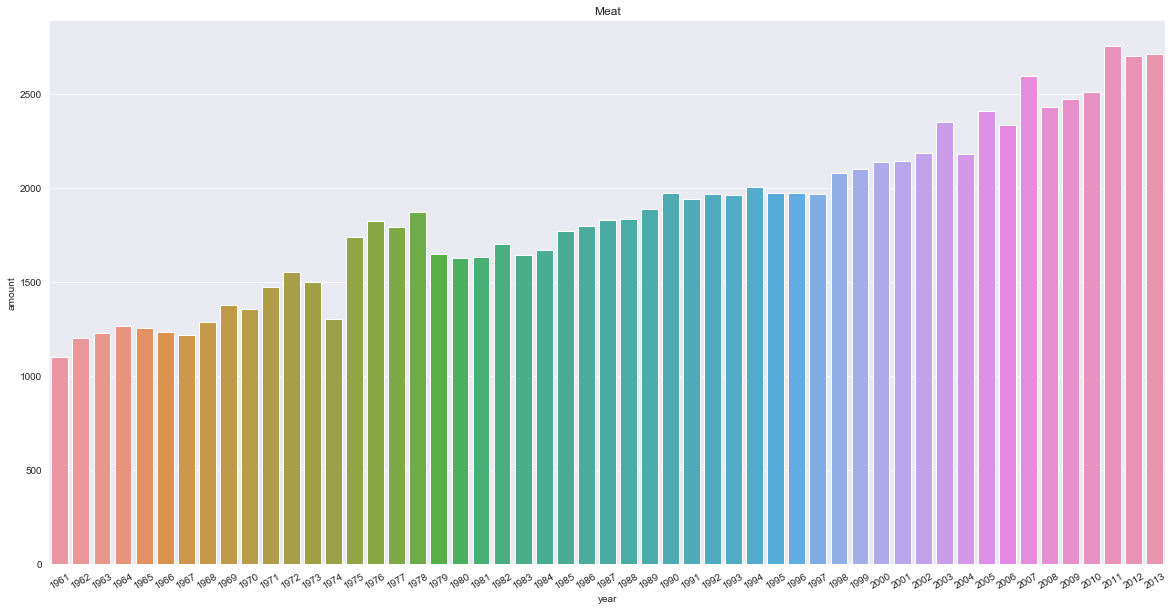

In [15]:
plot_supply(au,'food','Meat')

### Fruit

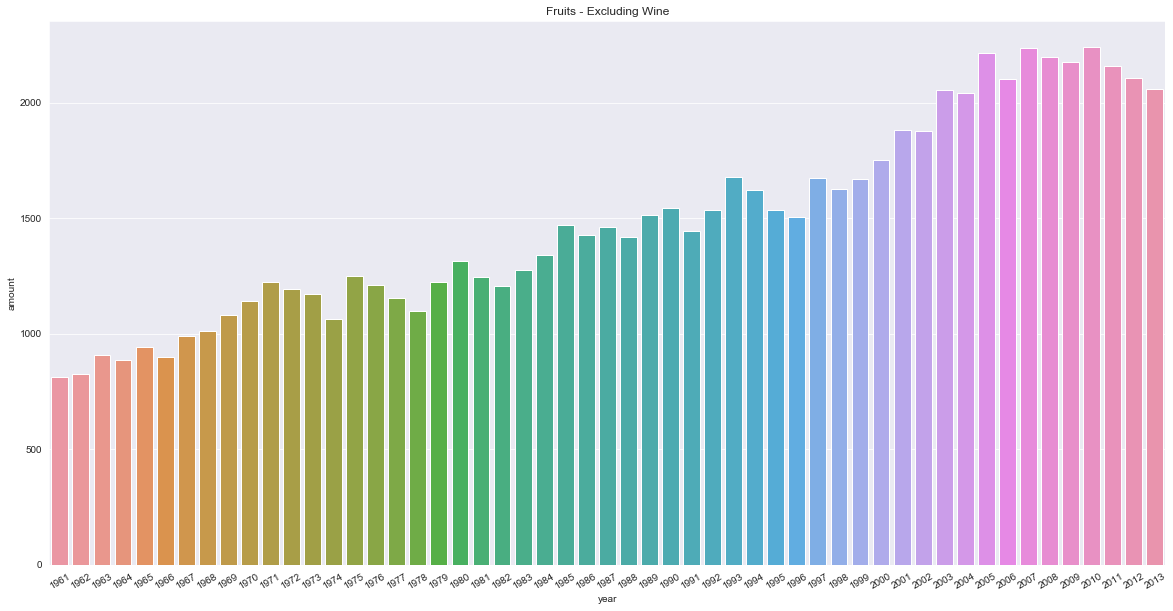

In [16]:
plot_supply(au,'food','Fruits - Excluding Wine')

### Beer

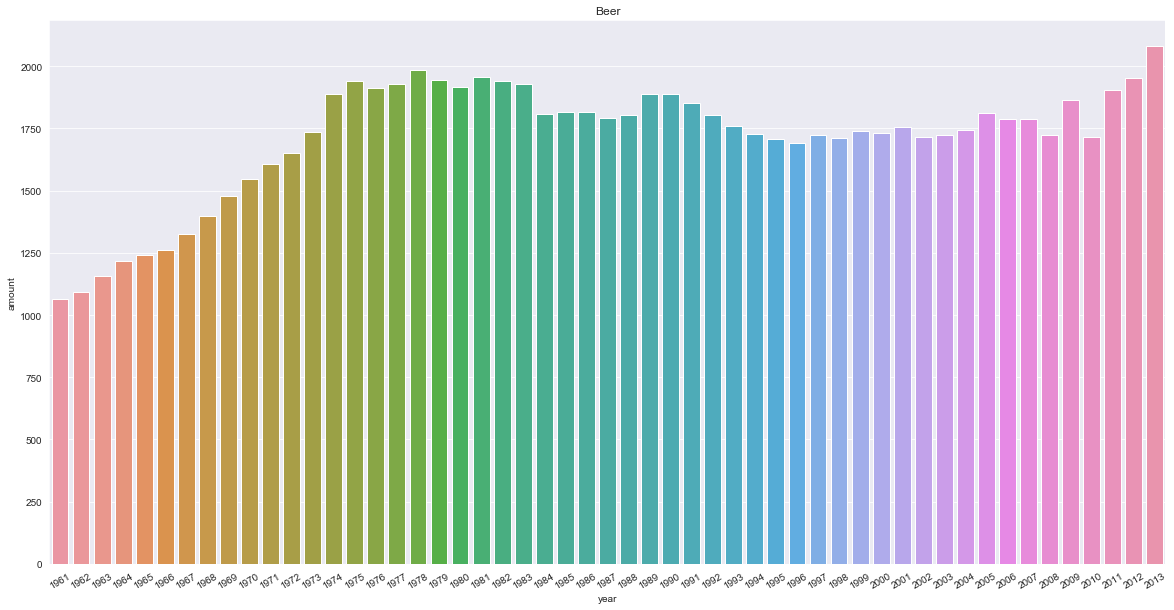

In [17]:
plot_supply(au,'food','Beer')

## Food vs Feed Overall Trend

In [18]:
au_overall = au.groupby('Element').sum().T
au_overall = au_overall[5:]
au_overall = au_overall.reset_index()
au_overall = au_overall.rename(columns={'index':'Year'})
au_overall['Year'] = au_overall['Year'].str.strip('Y')

au_overall[['Feed','Food']].iplot(kind='spread')

# Overview of the World

In [19]:
top_10 = df[df['Element']=='Food'].groupby('Item').sum().reset_index()[['Item','Y2013']].sort_values('Y2013',ascending=False).head(10)
top_10 = top_10.rename(columns={'Y2013':'Amount'})
top_10

,Item,Amount
51,Milk - Excluding Butter,1259476
16,Cereals - Excluding Beer,1029017
110,Vegetables,982974
111,"Vegetables, Other",762130
36,Fruits - Excluding Wine,544878
112,Wheat and products,457824
94,Starchy Roots,443357
83,Rice (Milled Equivalent),377286
48,Meat,302411
0,Alcoholic Beverages,260701


In [20]:
top_10.iplot(kind='bar',x='Item',y='Amount')

## Geospatial Plot for 2013

In [21]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True) 

The below function takes a food item and processes the data for our geospatial plot.

In [22]:
def food13(food):
    food_2013 = df[(df['Element']=='Food') & (df['Item']==food)]
    food_2013 = food_2013[['Area Abbreviation','Area Code','Area','Item Code','Item','Element Code','Element',
                                  'Unit','Y2013']]
    food_2013 = food_2013.rename(columns = {'Y2013':'Supply'})
    return food_2013

### Milk Supply

In [23]:
import plotly.express as px

fig=px.choropleth(food13('Milk - Excluding Butter'), locations="Area Abbreviation",
                    color= np.log(food13('Milk - Excluding Butter')['Supply']),# Use log so outliers do not skew color
                    hover_name="Area",
                    hover_data=['Supply'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

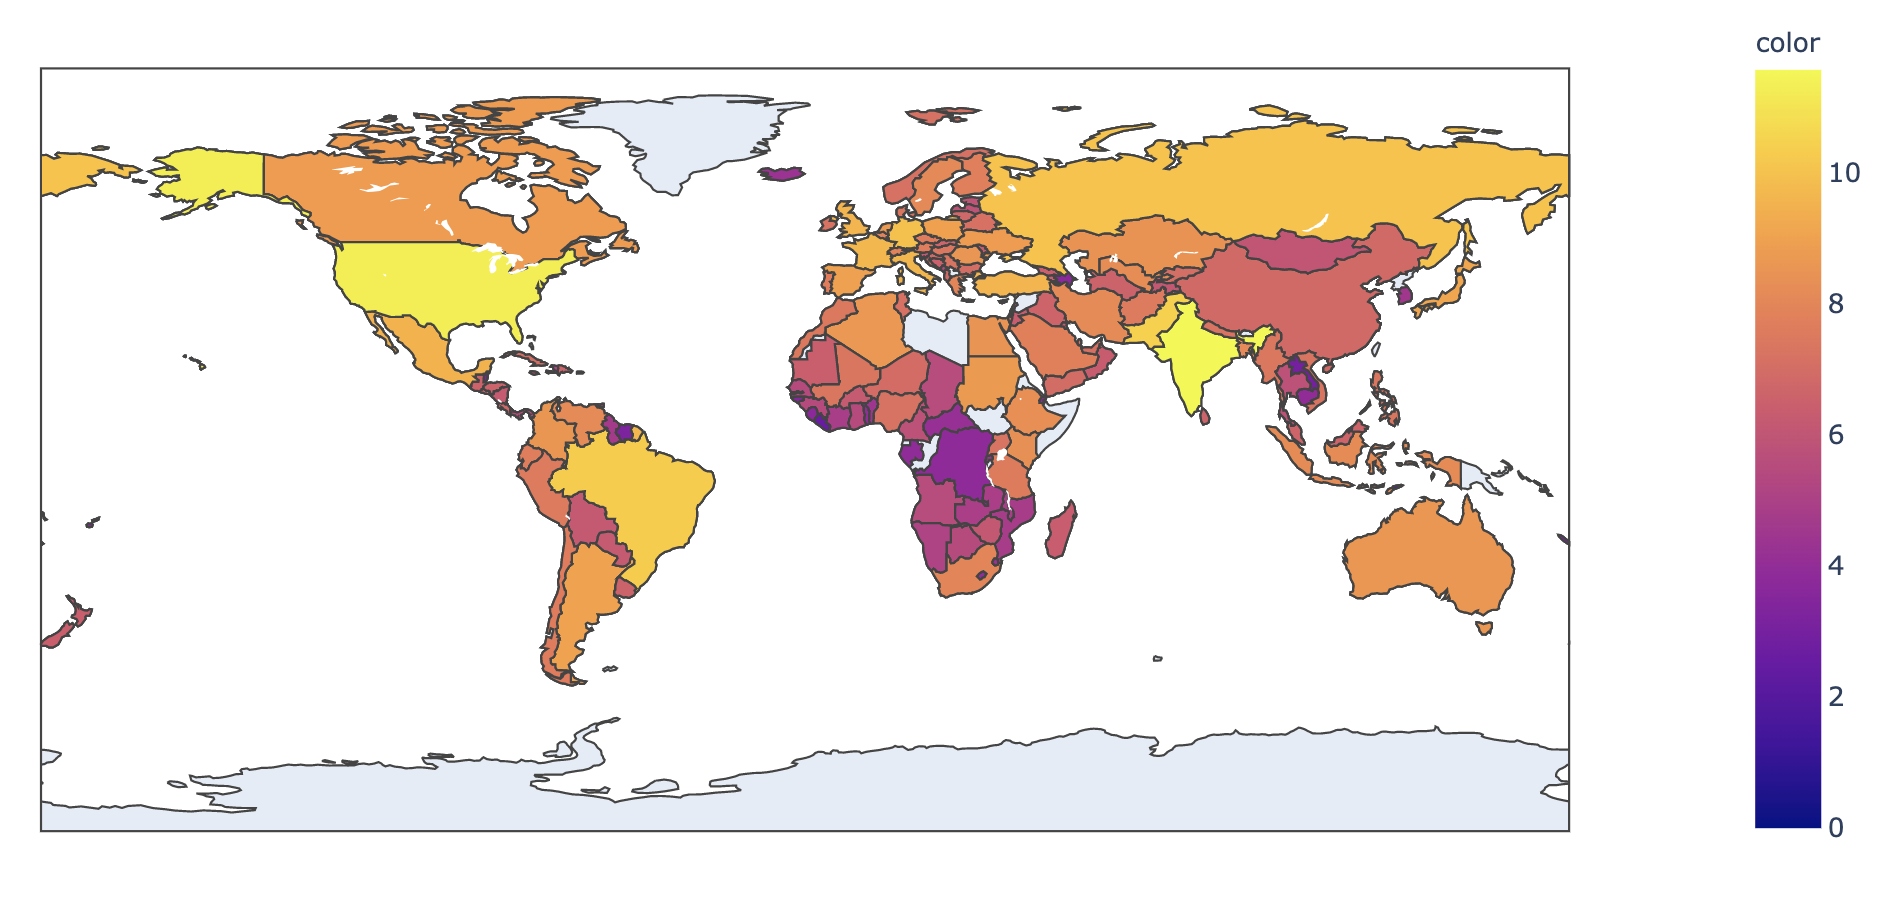

## Total Food

In [177]:
food_total_2013 = df[df['Element']=='Food'].groupby('Area Abbreviation').sum().reset_index()[['Area Abbreviation','Y2013']]

In [178]:
import plotly.express as px

fig=px.choropleth(food_total_2013, locations="Area Abbreviation",
                    color= np.log(food_total_2013['Y2013']),# Use log so outliers do not skew color
                    hover_name="Area Abbreviation",
                    hover_data=['Y2013'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

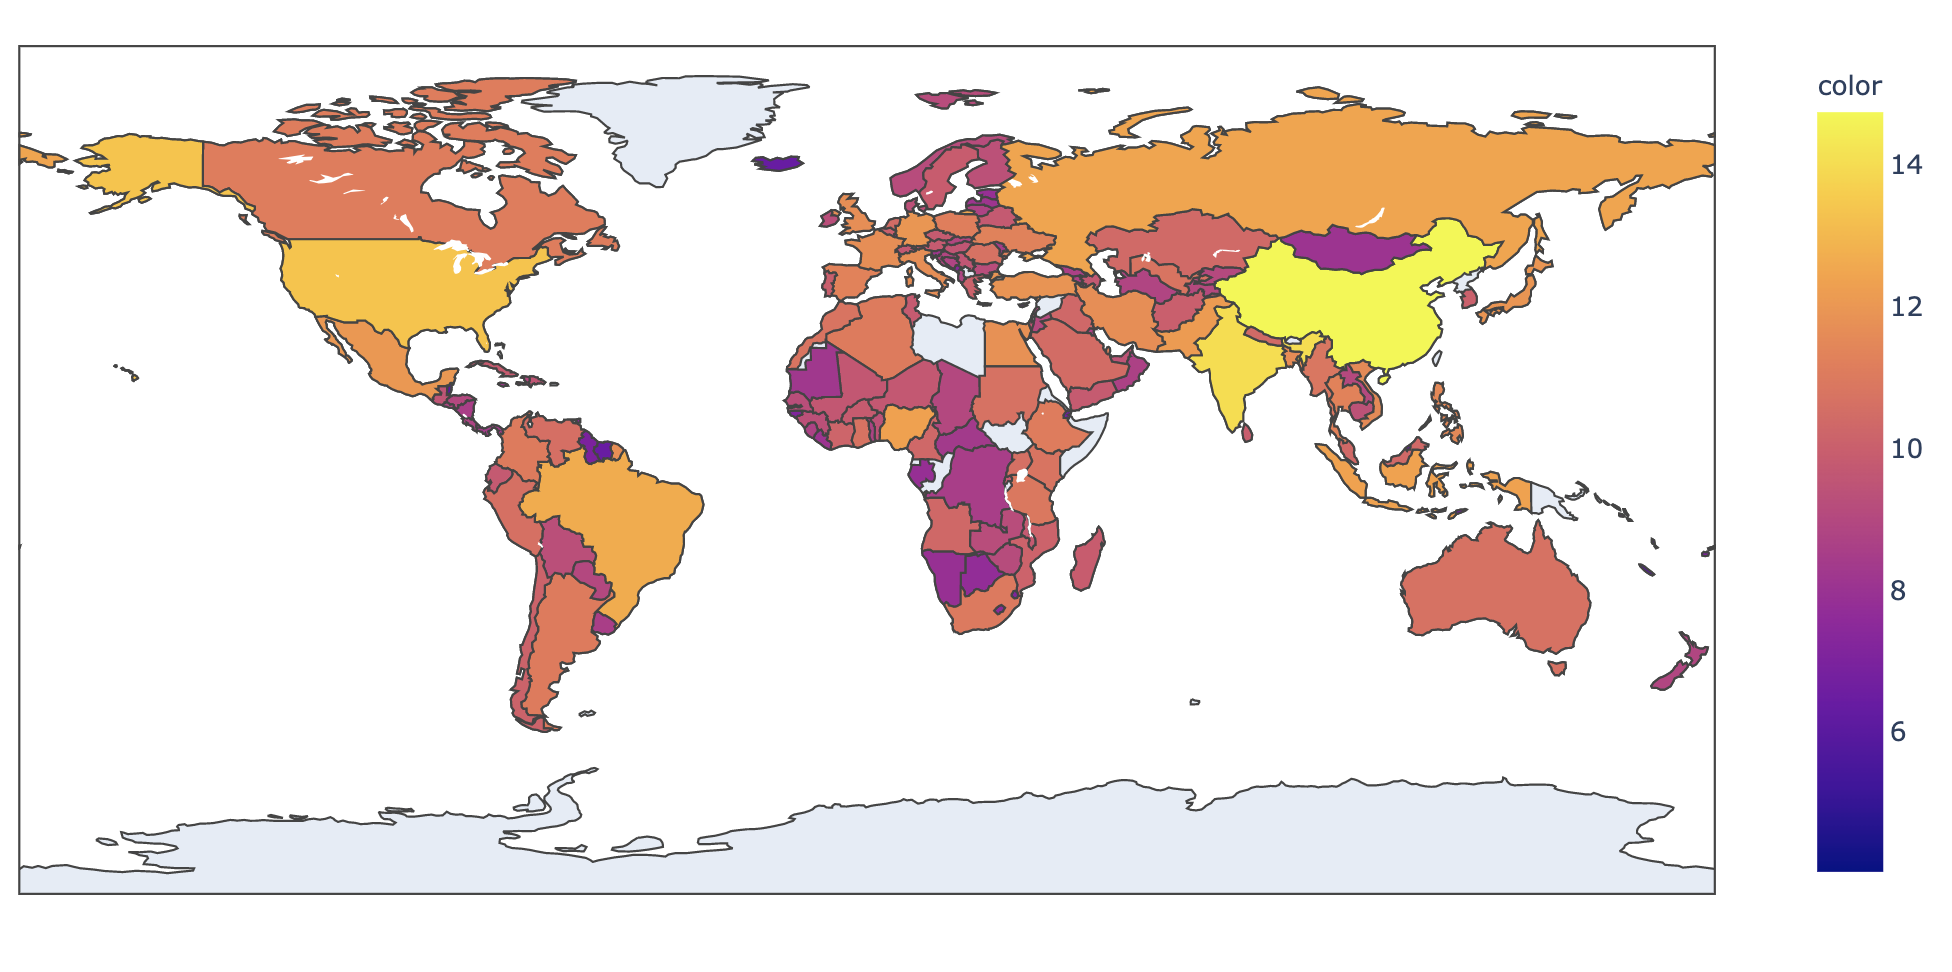

- It makes sense that China, followed by India consume the most food as they are the most populous countires on our planet.

### Total Feed

In [179]:
feed_total_2013 = df[df['Element']=='Feed'].groupby('Area Abbreviation').sum().reset_index()[['Area Abbreviation','Y2013']]

In [180]:
import plotly.express as px

fig=px.choropleth(feed_total_2013, locations="Area Abbreviation",
                    color= np.log(feed_total_2013['Y2013']),# Use log so outliers do not skew color
                    hover_name="Area Abbreviation",
                    hover_data=['Y2013'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

/Users/wynnephilpott/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



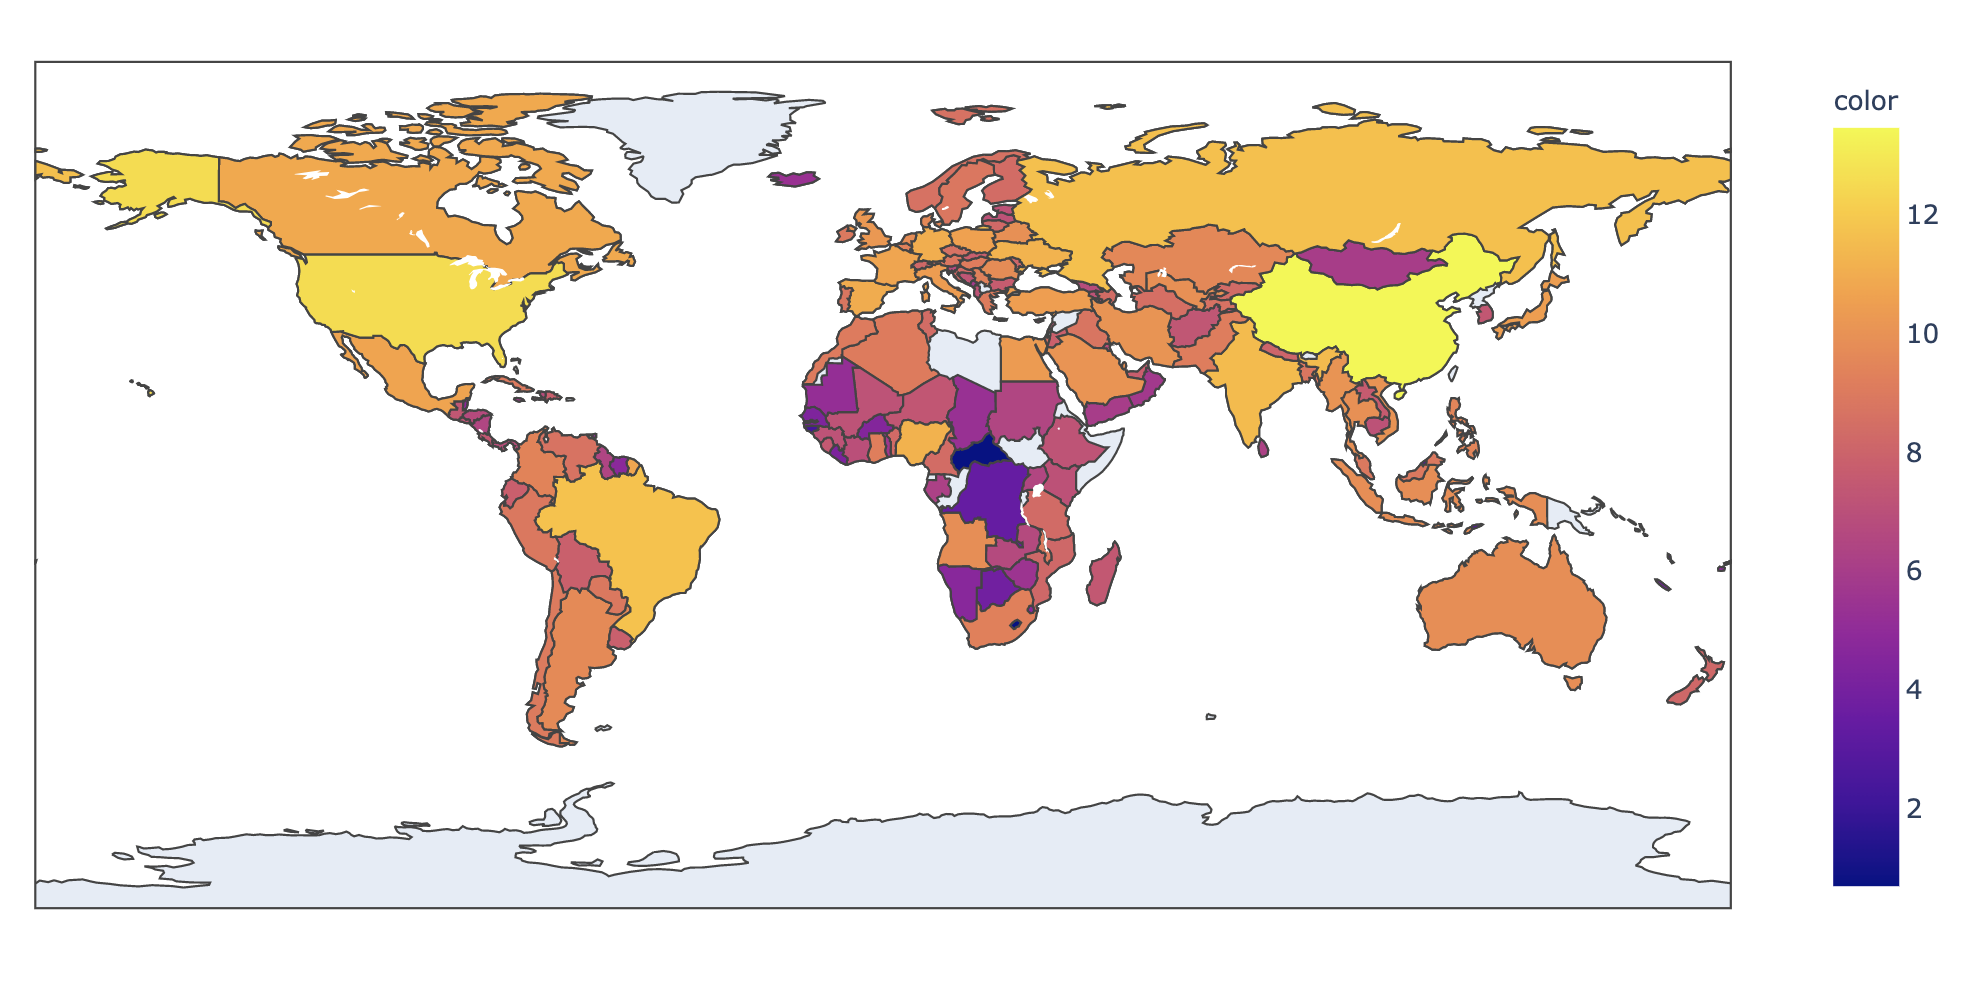

- Though our population is a fraction of that of India's, we have 3 times as much food avaliable for livestock. This could be b/c we have more arable land available.